### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 3


### Дисциплина: Методы машинного обучения

##### Студент:  Генералов Даниил
##### Группа:   НПИбд-01-21

## Москва 2024
***

### Вариант №12

Текст задания:

1. функция одной переменной f(х) = e^{-x}/(1+x) на отрезке [0,4]
2. Порядок производной функции одной переменной 4 
3. Функция ДВУХ переменных f(х, у) = x^3 sin y в области [0,2] х [0,2] 
4. Порядок смешанной производной функции двух переменных \del^3 / (\del x \del y^2)
5. Показатель качества регрессии: максимальная ошибка (MaxErr) 

  1. Постройте тензор ранга 1 (вектор) со значениями заданной в индивидуальном задании функции одной переменной на заданном в индивидуальном задании отрезке и определите максимальное и минимальное значения функции.

2. Постройте график функции с прямыми, соответствующими максимальному и минимальному значениям, подписывая оси и рисунок и создавая легенду.

3. Найдите значения производной от функции порядка, указанного в индивидуальном задании, и постройте график полученной функции, подписывая оси и рисунок.

4. Постройте тензор ранга 2 (матрицу) со значениями заданной в индивидуальном задании функции двух переменных на заданном в индивидуальном задании прямоугольнике и определите максимальное и минимальное значения функции.

5. Постройте 3d график поверхности функции двух переменных, подписывая оси и рисунок.

6. Найдите значения смешанной производной от функции порядка, указанного в индивидуальном задании, и постройте 3d график поверхности полученной функции, подписывая оси и рисунок.

7. Решите задачу парной линейной регрессии при помощи модели TensorFlow, рассматривая тензор ранга 1 из пункта 1 задания как значения зависимой переменной (отклика), а точки отрезка из индивидуального задания как значения независимой переменной (предиктора). Предварительно масштабируйте независимую и зависимую переменные на интервал $[0, 1]$. Оцените качество полученной модели по показателю качества регрессии, указанному в индивидуальном задании. Количество эпох, скорость обучения и начальные значения весов выберите самостоятельно, обеспечивая сходимость итерационной процедуры.

8. Постройте кривую обучения для показателя качества регрессии, указанного в индивидуальном задании, с зависимостью от количества эпох. Показатель качества регрессия реализуйте как функцию с использованием функций модуля `tf.math`.

9. Изобразите на графике точки набора данных (независимой и зависимой переменных) и линию построенной парной регрессии, подписывая оси и рисунок и создавая легенду.

# 1: тензор из функции одной переменной

In [1]:
import tensorflow as tf
import numpy as np
import math

2024-05-02 14:31:49.978605: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 14:31:49.981745: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 14:31:50.024592: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 14:31:50.889795: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
f1 = lambda x: tf.pow(math.e, -x) / (1+x)

In [3]:
X = tf.constant(np.linspace(0, 4, 1000))
Y = f1(X)

2024-05-02 14:31:51.868865: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
maxval = tf.reduce_max(Y)
minval = tf.reduce_min(Y)
print("Минимум:", minval)
print("Максимум:", maxval)

Минимум: tf.Tensor(0.0036631277777468365, shape=(), dtype=float64)
Максимум: tf.Tensor(1.0, shape=(), dtype=float64)


# 2: график функции

In [5]:
import matplotlib.pyplot as plt

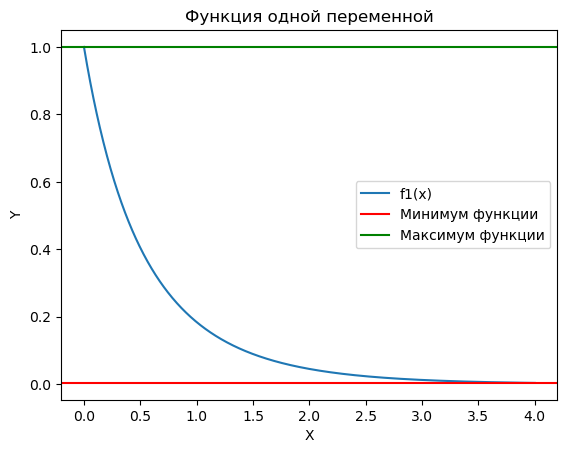

In [6]:
plt.figure()
plt.title("Функция одной переменной")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(X, Y, label="f1(x)")
plt.axhline(y=minval, color="red", label="Минимум функции")
plt.axhline(y=maxval, color="green", label="Максимум функции")
plt.legend()

# 3: производная

In [7]:
x = tf.Variable(X)

d1 = None
d2 = None
d3 = None
d4 = None

with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        with tf.GradientTape() as gt3:
            with tf.GradientTape() as gt4:
                y = f1(x)
            d1 = gt4.gradient(y, x)
        d2 = gt3.gradient(d1, x)
    d3 = gt2.gradient(d2, x)
d4 = gt1.gradient(d3, x)

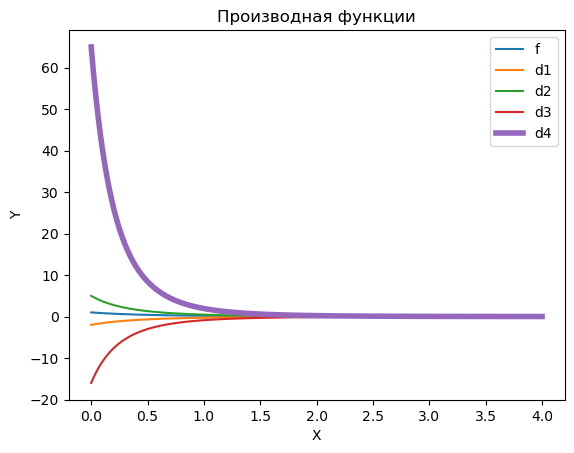

In [8]:
plt.figure()
plt.title("Производная функции")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, f1(x), label="f")
plt.plot(x, d1, label="d1")
plt.plot(x, d2, label="d2")
plt.plot(x, d3, label="d3")
plt.plot(x, d4, label="d4", linewidth=4)
plt.legend()

# 4. функция двух переменных

In [9]:
f2 = lambda x, y: tf.pow(x, 3) * tf.sin(y)

In [10]:
ax = np.linspace(0, 2, 100)
X, Y = tf.constant(np.meshgrid(ax, ax))
Z = f2(X, Y)

In [11]:
maxval = tf.reduce_max(Z)
minval = tf.reduce_min(Z)
print("Минимум:", minval)
print("Максимум:", maxval)

Минимум: tf.Tensor(0.0, shape=(), dtype=float64)
Максимум: tf.Tensor(7.999901544236871, shape=(), dtype=float64)


# 5. 3D-график

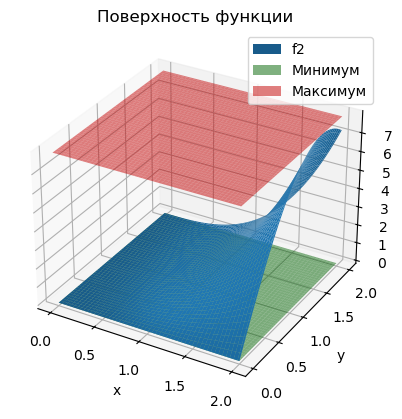

In [12]:


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Поверхность функции")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.plot_surface(X, Y, Z, label="f2")
ax.plot_surface(X, Y, np.full(Z.shape, minval), color="green", label="Минимум", alpha=0.5)
ax.plot_surface(X, Y, np.full(Z.shape, maxval), color="red", label="Максимум", alpha=0.5)
ax.legend()

# 6. смешанная производная

In [13]:
x = tf.Variable(X)
y = tf.Variable(Y)
with tf.GradientTape() as gt1:
    with tf.GradientTape() as gt2:
        with tf.GradientTape() as gt3:
            z = f2(x, y)
        dz_dx = gt3.gradient(z, x)
    dz2_dxdy = gt2.gradient(dz_dx, y)
dz3_dxdydy = gt1.gradient(dz2_dxdy, y)

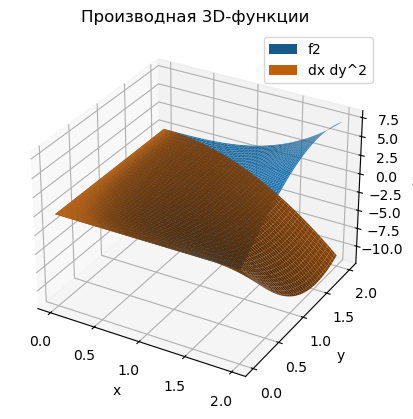

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Производная 3D-функции")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.plot_surface(x, y, z, label="f2")
ax.plot_surface(x, y, dz3_dxdydy, label="dx dy^2")
ax.legend()

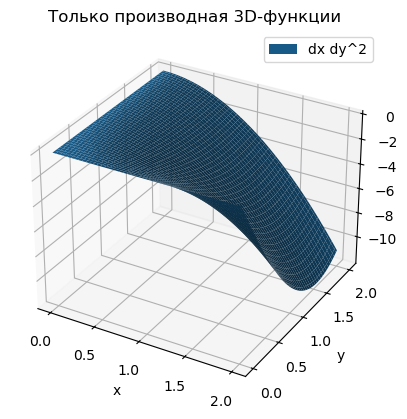

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Только производная 3D-функции")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# ax.plot_surface(x, y, z, label="f2")
ax.plot_surface(x, y, dz3_dxdydy, label="dx dy^2")
ax.legend()

# 7. парная линейная регрессия

In [16]:
X_src = np.linspace(0, 4, 1000)
Y_src = f1(X_src)
X_dst = (X_src - min(X_src)) / (max(X_src) - min(X_src))
Y_dst = (Y_src - min(Y_src)) / (max(Y_src) - min(Y_src))

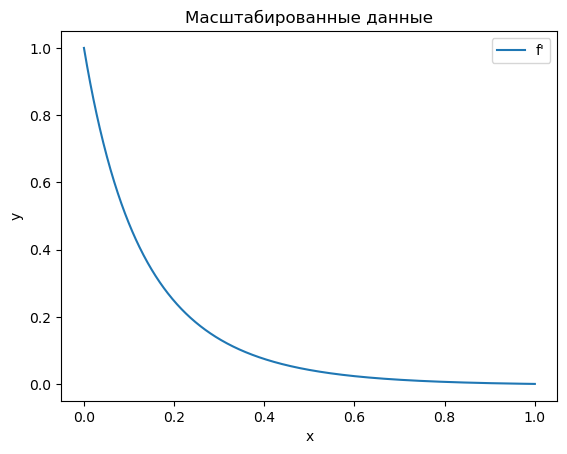

In [17]:
plt.figure()
plt.title("Масштабированные данные")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X_dst, Y_dst, label="f'")
plt.legend()

In [18]:
class Model():
    def __init__(self):
        self.w = tf.Variable(tf.random.normal(()))
        self.b = tf.Variable(tf.random.normal(()))
    def __call__(self, x):
        return tf.add(tf.multiply(self.w, x), self.b)

model = Model()
model.w, model.b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.12183638>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.0161414>)

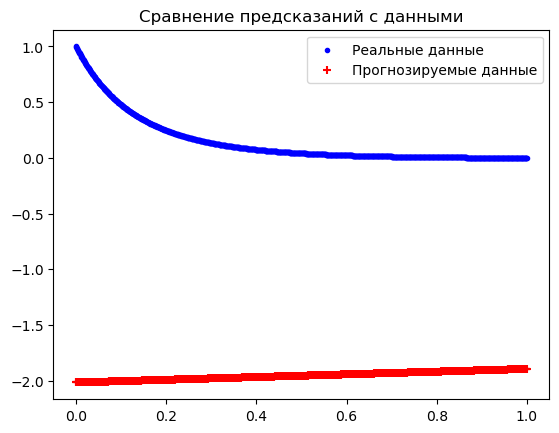

In [19]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

def maxerr(predicted, target):
    return tf.reduce_max(tf.abs(predicted - target))

def plot_data(inputs, outputs, predicted_outputs):
    plt.figure()
    plt.title("Сравнение предсказаний с данными")
    real = plt.scatter(inputs, outputs, c='b', marker='.')
    predicted = plt.scatter(inputs, predicted_outputs, c='r', marker='+')
    plt.legend((real,predicted), ('Реальные данные', 'Прогнозируемые данные'))
    plt.show()

plot_data(X_dst, Y_dst, model(X_dst))

## обучение

In [20]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as gt:
        current_loss = loss(model(inputs), outputs)
    dw, db = gt.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

In [21]:
model = Model()

list_w, list_b = [], []
epochs = range(200)
losses = []
maxerrs = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, X_dst, Y_dst, learning_rate=0.1)
  losses.append(current_loss)
  maxerrs.append(maxerr(model(X_dst), Y_dst))
  # print('Эпоха %2d: w=%1.2f b=%1.2f, потери=%2.5f' %
  #       (epoch, list_w[-1], list_b[-1], current_loss))

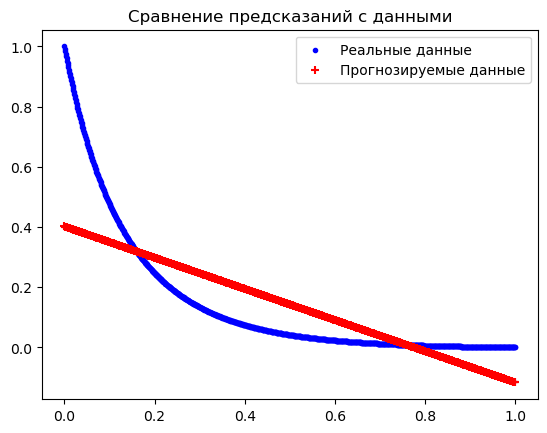

In [22]:
plot_data(X_dst, Y_dst, model(X_dst))

# 8. кривая обучения

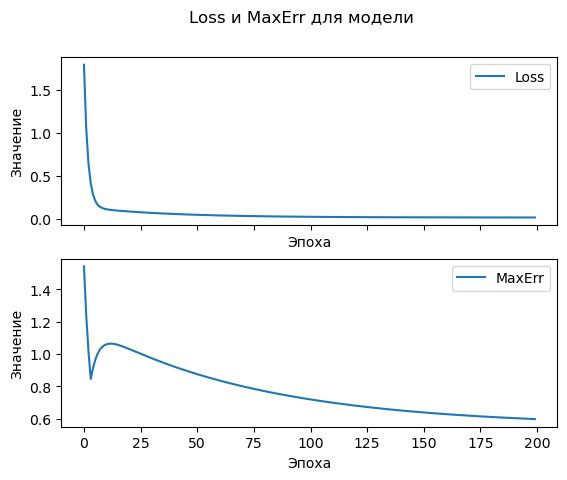

In [23]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
plt.suptitle("Loss и MaxErr для модели")
ax1.plot(epochs, losses, label="Loss")
ax1.set_xlabel("Эпоха")
ax1.set_ylabel("Значение")
ax1.legend()
ax2.plot(epochs, maxerrs, label="MaxErr")
ax2.set_xlabel("Эпоха")
ax2.set_ylabel("Значение")
ax2.legend()

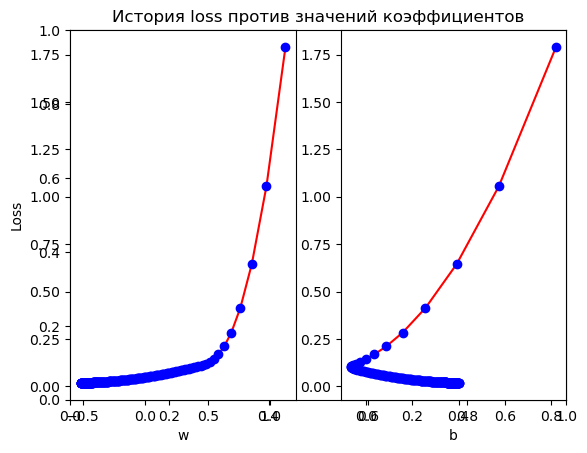

In [24]:
def plot_loss_for_weights(weights_list, losses):
  for idx, weights in enumerate(weights_list):
    plt.subplot(120 + idx + 1)
    plt.plot(weights['values'], losses, 'r')
    plt.plot(weights['values'], losses, 'bo')
    plt.xlabel(weights['name'])
    if idx==0:
        plt.ylabel('Loss')


weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plt.title("История loss против значений коэффициентов")
plot_loss_for_weights(weights_list, losses)

# 9. оценка предсказаний

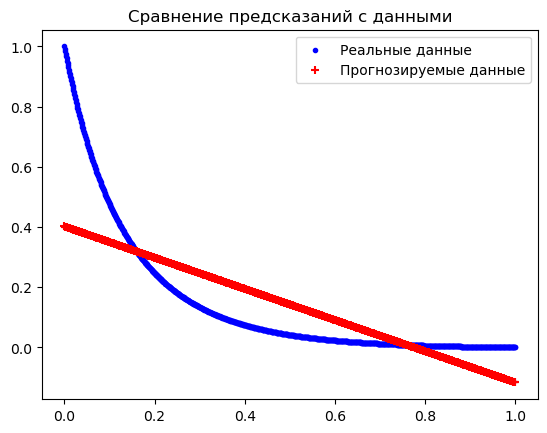

In [25]:
plot_data(X_dst, Y_dst, model(X_dst))

In [26]:
print("Loss = ", loss(model(X_dst), Y_dst))
print("MaxErr = ", maxerr(model(X_dst), Y_dst))

Loss =  tf.Tensor(0.0183564, shape=(), dtype=float32)
MaxErr =  tf.Tensor(0.5981536, shape=(), dtype=float32)
